# Credit Card Application

Banks and financial institutions often need to predict customer behavior, such as the likelihood of a customer accepting a loan offer, to target their marketing efforts effectively. This helps in increasing the acceptance rate of their offers while reducing marketing costs.

Our objective is to create a model that forecasts the propensity (probability) of customers responding to a personal loan campaign, we will utilize logistic regression. The outcomes will be categorized, and the factors influencing the answer will be found using the model's probability. Building a model that identifies clients who are most likely to accept the loan offer in upcoming personal loan campaigns is the objective.

We import necessary libraries to handle data manipulation, visualization, and model building. These libraries provide functions to simplify complex operations, ensuring efficient data processing and analysis.

TEAM CONTRIBUTIONS



1.   Samayraa Thadani - Data Exploration
2.   Kon Dalglish - Handling Missing Values, Data Pre-processing & Model Building
3.   Vaibhav Sanghai - Importing Libraries & Data, Model Evaluation & Answering Red Questions
4.   Olivia Shue - NULL

# Grading Scheme:

1. **Importing Libraries and Data (10 points)**
   - Correctly import all required libraries; remove any unncessary libraries: 5 points
   - Correctly read the dataset: 5 points

2. **Data Exploration (20 points)**
   - Correctly display dimensions, first and last entries: 10 points
   - Correctly display descriptive statistics: 10 points

3. **Handling Missing Values (20 points)**
   - Correctly impute missing numeric values: 10 points
   - Correctly impute missing non-numeric values: 10 points

4. **Data Pre-processing (20 points)**
   - Correctly encode non-numeric data: 10 points
   - Correctly plot histograms and heatmap: 10 points

5. **Model Building (30 points)**
   - Correctly split data into train and test sets: 10 points
   - Correctly scale the data: 10 points
   - Correctly build and fit the logistic regression model: 10 points

6. **Model Evaluation (30 points)**
   - Correctly calculate and display confusion matrix: 10 points
   - Correctly calculate and plot the ROC curve: 20 points

7. **Answering Red Questions**
   - Correctly answer all subjective questions in red: 20 points


Total: 150 points

## 1. Importing Libraries

In [ ]:
# KEEP ONLY THE REQUIRED LIBRARIES; REMOVE OTHERS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, confusion_matrix, accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics

## <span style="color:red">*Q1. Why only the required libraries are kept in the code?*</span>

Keeping only required libraries ensures code efficiency, readability, and maintainability. It reduces memory overhead and improves execution speed by not loading unnecessary modules. It helps others quickly understand which tools are actually used in the analysis and makes debugging easier since fewer dependencies are involved.

## 2) Importing and Descriptive Stats

To market their loan products to people who already have deposit accounts, BankABC wants to create a direct marketing channel. To cross-sell personal loans to its current clients, the bank ran a test campaign. An enticing personal loan offer and processing charge waiver were aimed at a random group of 20000 clients. The targeted clients' information has been provided, together with information on how they responded to the marketing offer.

In [ ]:
#data.head()
# Replace with the path to your CSV file
file_path = 'Approval.csv'

data = []

# Open and read the CSV file
with open(file_path, mode='r', newline='', encoding='utf-8') as file:
    reader = csv.reader(file)

    firstrow = 0
    for row in reader:
        if firstrow == 0:
          firstrow = firstrow + 1
          continue

        data.append(row)

**Instructions:**
1. Get the dimensions of the array and print them.
2. Verify if the correct dataset was imported by checking the first 15 entries.
3. Verify by checking the last five entries.
4. Display descriptive statistics of the dataset.

In [ ]:
# GETTING THE DIMENSIONS OF THE ARRAY
num_rows = len(data)
num_cols = len(data[0]) if data else 0  # Handles empty file safely
print(f"Data dimensions: {num_rows} rows × {num_cols} columns")

Data dimensions: 690 rows × 16 columns


In [ ]:
# VERIFYING IF WE IMPORTED THE RIGHT DATASET BY CHECKING THE FIRST 15 ENTRIES OF THE DATA
print("First 15 entries")
for row in data[:15]:
    print(row)

First 15 entries
['1', '30.83', '0', '1', '1', 'Industrials', 'White', '1.25', '1', '1', '1', '0', 'ByBirth', '202', '0', '1']
['0', '58.67', '4.46', '1', '1', 'Materials', 'Black', '3.04', '1', '1', '6', '0', 'ByBirth', '43', '560', '1']
['0', '24.5', '0.5', '1', '1', 'Materials', 'Black', '1.5', '1', '0', '0', '0', 'ByBirth', '280', '824', '1']
['1', '27.83', '1.54', '1', '1', 'Industrials', 'White', '3.75', '1', '1', '5', '1', 'ByBirth', '100', '3', '1']
['1', '20.17', '5.625', '1', '1', 'Industrials', 'White', '1.71', '1', '0', '0', '0', 'ByOtherMeans', '120', '0', '1']
['1', '32.08', '4', '1', '1', 'CommunicationServices', 'White', '2.5', '1', '0', '0', '1', 'ByBirth', '360', '0', '1']
['1', '33.17', '1.04', '1', '1', 'Transport', 'Black', '6.5', '1', '0', '0', '1', 'ByBirth', '164', '31285', '1']
['0', '22.92', '11.585', '1', '1', 'InformationTechnology', 'White', '0.04', '1', '0', '0', '0', 'ByBirth', '80', '1349', '1']
['1', '54.42', '0.5', '0', '0', 'Financials', 'Black', '3.9

In [ ]:
# VERIFYING IF WE IMPORTED THE RIGHT DATASET BY CHECKING THE LAST FIVE ENTRIES OF THE DATA
print("\nLast 5 entries:")
for row in data[-5:]:
    print(row)


Last 5 entries:
['1', '21.08', '10.085', '0', '0', 'Education', 'Black', '1.25', '0', '0', '0', '0', 'ByBirth', '260', '0', '0']
['0', '22.67', '0.75', '1', '1', 'Energy', 'White', '2', '0', '1', '2', '1', 'ByBirth', '200', '394', '0']
['0', '25.25', '13.5', '0', '0', 'Healthcare', 'Latino', '2', '0', '1', '1', '1', 'ByBirth', '200', '1', '0']
['1', '17.92', '0.205', '1', '1', 'ConsumerStaples', 'White', '0.04', '0', '0', '0', '0', 'ByBirth', '280', '750', '0']
['1', '35', '3.375', '1', '1', 'Energy', 'Black', '8.29', '0', '0', '0', '1', 'ByBirth', '0', '0', '0']


In [ ]:
# DESCRIPTIVE STATS
columns = [
    'Gender', 'Age', 'Debt', 'Married', 'BankCustomer', 'Industry',
    'Ethnicity', 'YearsEmployed', 'PriorDefault', 'Employed', 'CreditScore',
    'DriversLicense', 'Citizen', 'ZipCode', 'Income', 'Approved'
]

df = pd.read_csv(file_path, header=None, names=columns, skiprows=1)
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          690 non-null    int64  
 1   Age             690 non-null    float64
 2   Debt            690 non-null    float64
 3   Married         690 non-null    int64  
 4   BankCustomer    690 non-null    int64  
 5   Industry        690 non-null    object 
 6   Ethnicity       690 non-null    object 
 7   YearsEmployed   690 non-null    float64
 8   PriorDefault    690 non-null    int64  
 9   Employed        690 non-null    int64  
 10  CreditScore     690 non-null    int64  
 11  DriversLicense  690 non-null    int64  
 12  Citizen         690 non-null    object 
 13  ZipCode         690 non-null    int64  
 14  Income          690 non-null    int64  
 15  Approved        690 non-null    int64  
dtypes: float64(3), int64(10), object(3)
memory usage: 201.7 KB


In [ ]:
# DESCRIPTIVE STATS
print(df.describe)

<bound method NDFrame.describe of      Gender    Age    Debt  Married  BankCustomer         Industry Ethnicity  \
0         1  30.83   0.000        1             1      Industrials     White   
1         0  58.67   4.460        1             1        Materials     Black   
2         0  24.50   0.500        1             1        Materials     Black   
3         1  27.83   1.540        1             1      Industrials     White   
4         1  20.17   5.625        1             1      Industrials     White   
..      ...    ...     ...      ...           ...              ...       ...   
685       1  21.08  10.085        0             0        Education     Black   
686       0  22.67   0.750        1             1           Energy     White   
687       0  25.25  13.500        0             0       Healthcare    Latino   
688       1  17.92   0.205        1             1  ConsumerStaples     White   
689       1  35.00   3.375        1             1           Energy     Black   

     

## 3) Handling Missing Values

Missing values in the dataset can lead to incorrect analysis and model predictions. Imputing missing values ensures the integrity of the dataset, making it possible to build reliable models.

**Instructions:**
1. Check for missing values.
2. Impute missing values for numeric data using the mean and for non-numeric data using the mode.

In [ ]:
# CHECK FOR MISSING VALUES
# Check missing values column-wise
print(df.isnull().sum())

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64


In [ ]:
# IMPUTE MISSING VALUES

# for numeric data using mean
# For numeric columns: fill NaNs with mean
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    mean_val = df[col].mean()
    df[col].fillna(mean_val, inplace=True)

/tmp/ipython-input-157-2322668976.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(mean_val, inplace=True)


In [ ]:
# For non numeric data using mode
# For non-numeric columns: fill NaNs with mode
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
for col in non_numeric_cols:
    mode_val = df[col].mode()
    if not mode_val.empty:
        df.fillna({col: mode_val[0]}, inplace=True)

In [ ]:
#data.head(10)
# Now df has missing values imputed accordingly
print(df.isnull().sum())  # Verify no missing values remain

Gender            0
Age               0
Debt              0
Married           0
BankCustomer      0
Industry          0
Ethnicity         0
YearsEmployed     0
PriorDefault      0
Employed          0
CreditScore       0
DriversLicense    0
Citizen           0
ZipCode           0
Income            0
Approved          0
dtype: int64


## <span style="color:red">*Q2. Is there any missing data at all?*</span>

As shown in the output, there are **no** missing values in the data as every column has 0 missing values.

## <span style="color:red">*Q3. Why do we impute mean for numeric and mode for non-numeric data?*</span>

We use **Mean Imputation for Numeric Data** as filling missing numerical values with the mean ensures minimal distortion to the overall data distribution and avoid bias that could occur if values are filled with arbitrary numbers.

We use **Mode Imputation for Non-Numeric (Categorical) Data** as categorical data cannot be averaged and using the most common category maintains consistency and avoids creating artificial new categories.

## 4) Data Preprocessing

Data preprocessing is crucial for preparing raw data for analysis. Converting non-numeric data to numeric forms, such as one-hot encoding, ensures compatibility with machine learning algorithms, which typically require numerical input.

In [ ]:
# CONVERTING ALL NON-NUMERIC DATA TO NUMERIC - USING ONE-HOT ENCODING

# INSTANTIATE LABELENCODER
ohe = OneHotEncoder(sparse_output=False)

# USE LABEL ENCODER le TO TRANSFORM VARIABLES

# Creating a new DataFrame for storing transformed data
data_transformed = pd.DataFrame()

for column in df.columns:
    if df[column].dtypes == 'object':
        encoded = ohe.fit_transform(df[[column]])
        # Set the column name of one-hot encoded DataFrame as column_value
        newColumn = pd.DataFrame(encoded,
                                 columns=ohe.get_feature_names_out([column]))
        # Concatenate to the transformed DataFrame
        data_transformed = pd.concat([data_transformed, newColumn], axis=1)
    else:
        # If not object type, just copy the data
        data_transformed = pd.concat([data_transformed, df[[column]]], axis=1)

df = data_transformed

print(df.head(10))

   Gender    Age    Debt  Married  BankCustomer  \
0       1  30.83   0.000        1             1   
1       0  58.67   4.460        1             1   
2       0  24.50   0.500        1             1   
3       1  27.83   1.540        1             1   
4       1  20.17   5.625        1             1   
5       1  32.08   4.000        1             1   
6       1  33.17   1.040        1             1   
7       0  22.92  11.585        1             1   
8       1  54.42   0.500        0             0   
9       1  42.50   4.915        0             0   

   Industry_CommunicationServices  Industry_ConsumerDiscretionary  \
0                             0.0                             0.0   
1                             0.0                             0.0   
2                             0.0                             0.0   
3                             0.0                             0.0   
4                             0.0                             0.0   
5                       

## 5) Data Visualization

**Instructions:**
1. Plot histograms for all variables to understand their distributions.
2. Calculate the correlation matrix and plot the heatmap to identify relationships between variables.

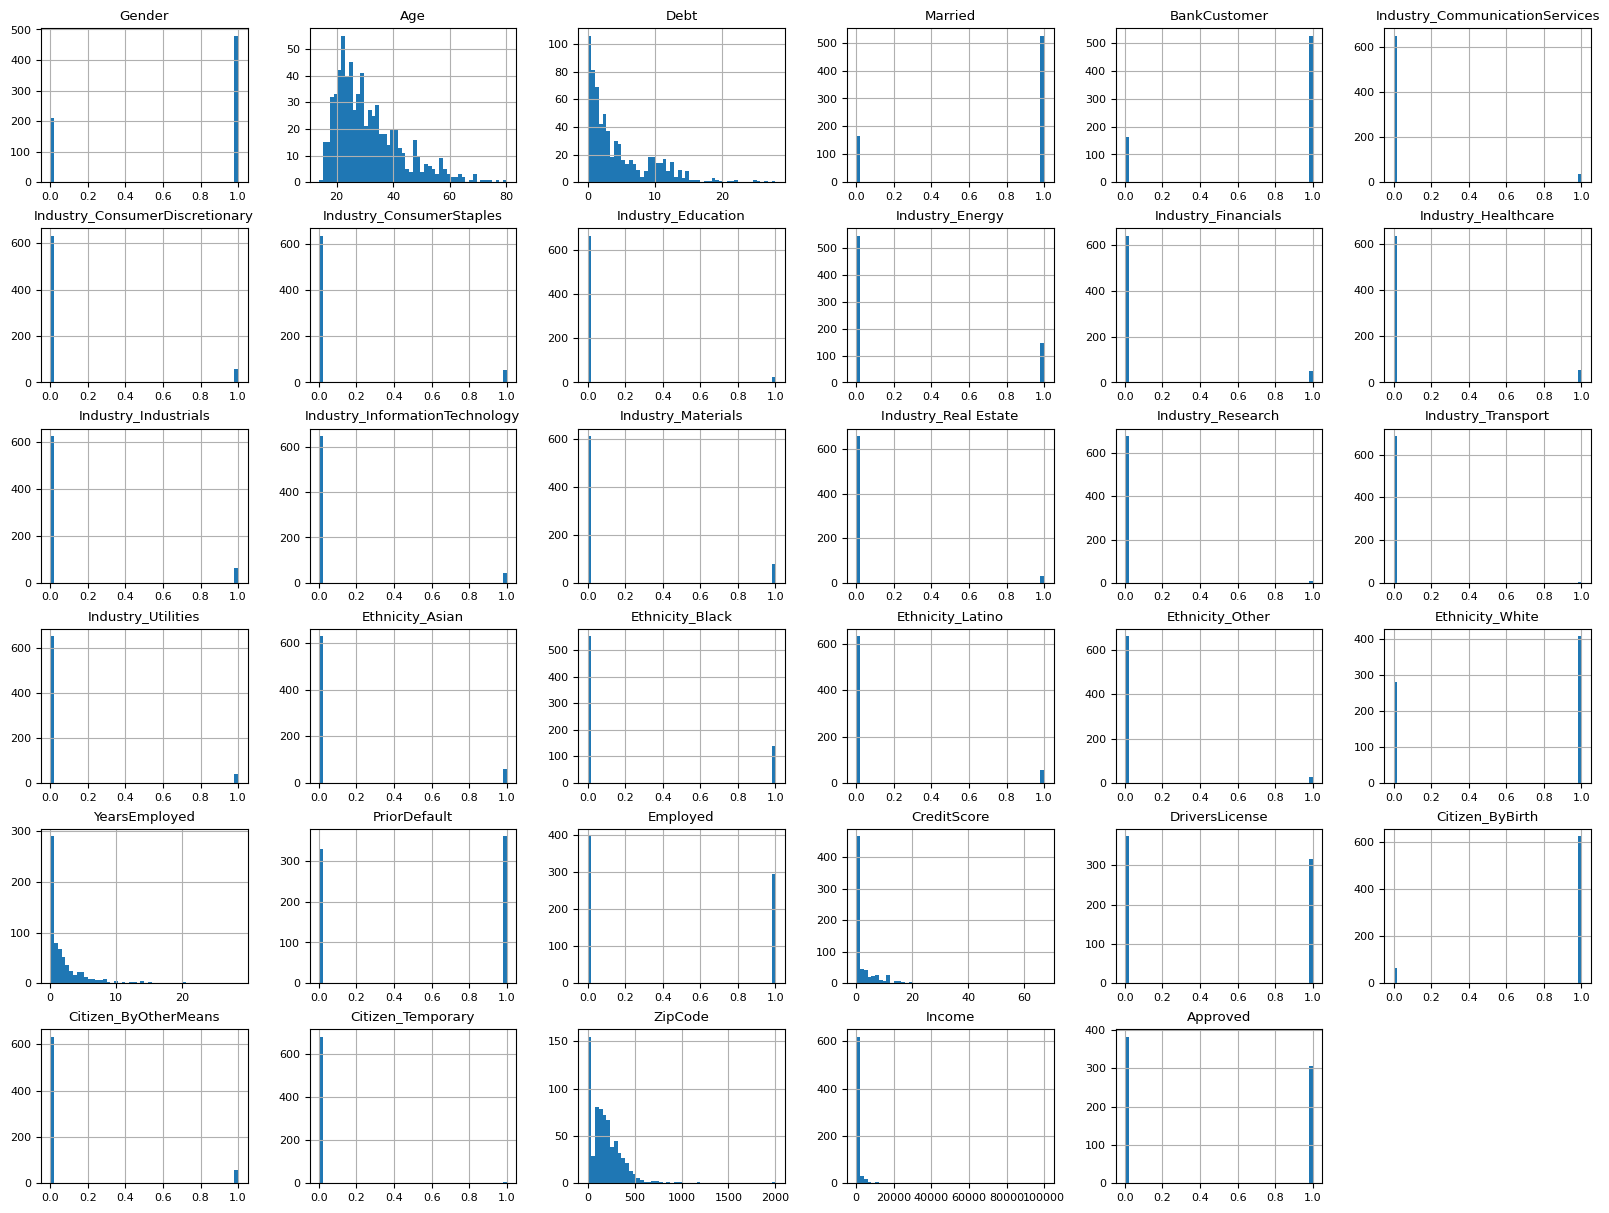

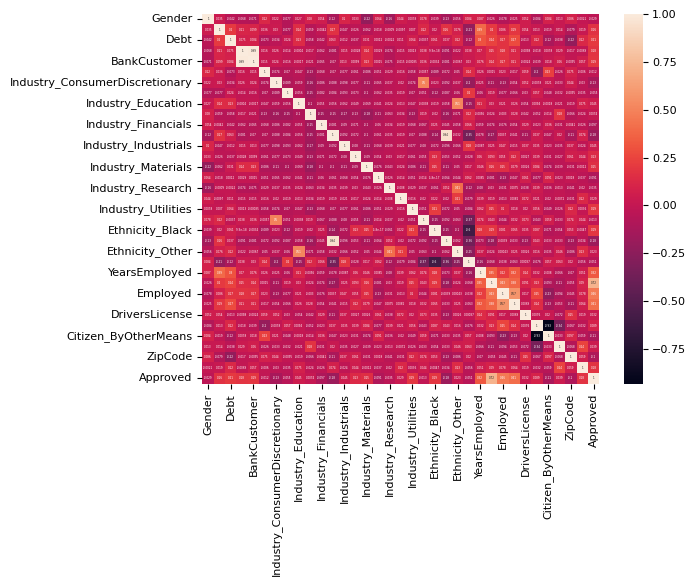

In [ ]:
# PLOTTING HISTOGRAMS FOR ALL VARIABLES
df.hist(bins=50, figsize=(20,15))
plt.show()
# CALCULATE THE CORRELATION MATRIX
corrMatrix = df.corr()
# Decrease font size
plt.rcParams['font.size'] = 8

# PLOT THE HEATMAP
sns.heatmap(corrMatrix, annot=True, annot_kws={"size": 2})
plt.show()

## <span style="color:red">*Q4. What do the histograms for all variables look like?*</span>

The data is not normally distributed. Median may be better than mean for some imputations. There is potential presence of outliers especially in variables like Income and CreditScore.

Many categorical variables are highly skewed to either 0 or 1 suggesting binary classification or one-hot encoding.

Age: Right-skewed (more younger people)

Debt: Right-skewed

CreditScore: Heavily skewed towards the lower end

Income: Extreme right skew (outliers with very high incomes)

YearsEmployed: Skewed towards lower values (most people have fewer years employed)

## <span style="color:red">*Q5. What does the correlation matrix and heatmap reveal about relationships between variables?*</span>

The correlation values are mostly **weak to moderate**. Very few features have high positive or negative correlation with the target Approved.

For example: Debt and Approved likely show some moderate correlation. Categorical dummy variables (one-hot) show near-zero or sparse correlations.


Multicollinearity risk is low. This means that Random Forest can handle this situation well.

## 6) Model Building

Model building involves training a machine learning model to make predictions based on historical data. In this case, we are predicting the likelihood of a credit card application being approved. Splitting the data into training and testing sets ensures that we can evaluate the model's performance on unseen data, providing a realistic assessment of its accuracy.

In [ ]:
# DROP THE VARIABLES NOT NEEDED
# SEGREGATE FEATURES AND LABELS INTO SEPARATE VARIABLES
X = df.drop('Approved', axis=1)
y = df['Approved']

# SPLIT INTO TRAIN AND TEST USING TRAIN_TEST_SPLIT()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

**Instructions:**
1. Scale the data using MinMaxScaler to ensure that all features contribute equally to the model. Scaling is important as it brings all features to a comparable range, improving the convergence of the learning algorithm.
2. Instantiate and fit a Logistic Regression model to the training set.

In [ ]:
# INSTANTIATE MINMAXSCALER AND USE IT TO RESCALE X_TRAIN AND X_TEST
scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

# You can try to do z-score normalization (look it up!)
# INSTANTIATE A LOGISTICREGRESSION CLASSIFIER WITH DEFAULT PARAMETER VALUES
# <Your code here>
model = LogisticRegression()

# FIT MODEL TO THE TRAIN SET
model.fit(X_train, y_train)

LogisticRegression()

In [ ]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True, intercept_scaling=1, l1_ratio=None, max_iter=100, multi_class='warn', n_jobs=None, penalty='l2',
random_state=None, solver='warn', tol=0.0001, verbose=0, warm_start=False)

LogisticRegression(multi_class='warn', solver='warn')

## <span style="color:red">*Q6. Why is it important to split the data into training and testing sets?*</span>

We generally use 70% as training data and 30% as test data depending on the data size.

We split the data to avoid Overfitting as it might just memorize the data instead of learning patterns that generalize. The test set shows roughly how the model would perform on unseen, real-world data. It also helps in assessing the impact of tuning without changing test results.

## 7) Model Evaluation

Evaluating the model's performance is crucial to ensure it can accurately predict outcomes on new data. The confusion matrix and accuracy score provide insights into the model's ability to distinguish between approved and not approved applications. This is critical for minimizing false approvals and rejections, directly impacting the bank's operations and customer satisfaction.

In [ ]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of logistic regression classifier: {accuracy}")
# PRINT THE CONFUSION MATRIX OF THE LOGREG MODEL
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix: \n{conf_matrix}")

Accuracy of logistic regression classifier: 0.8454106280193237
Confusion Matrix: 
[[88 22]
 [10 87]]


**Instructions:**
1. Calculate and plot the ROC curve for the model. The ROC curve is a graphical representation of a classifier's performance and is useful for visualizing the trade-off between the true positive rate and false positive rate at various threshold settings.

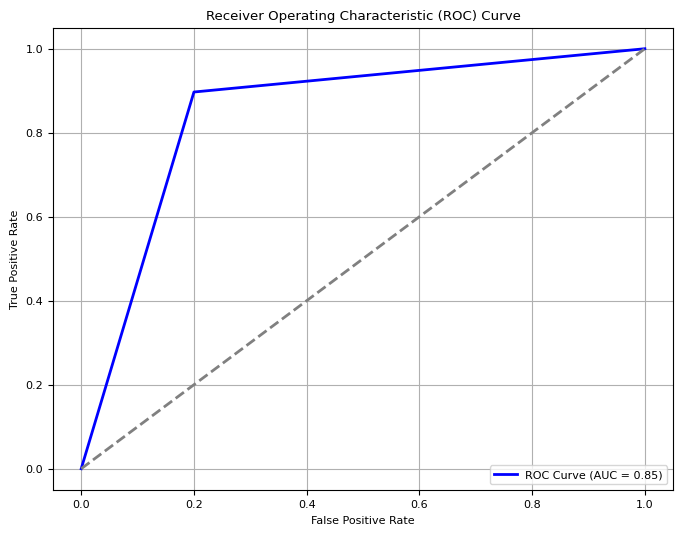

In [ ]:
# CALCULATE THE FPR AND TPR FOR ALL THRESHOLDS OF THE CLASSIFICATION
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# method to plot ROC Curve
roc_auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2)  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

## <span style="color:red">*Q7. Can you code a similar model for random forest?*</span>

Yes, we have coded it using elements of Random Forest. We use a 200 tree Random Forest and the Accuracy of this model is around 85.51%.

In [ ]:
# Instantiate a RandomForestClassifier with default parameters
rf = RandomForestClassifier(random_state=42)

# Fit the model on the training data
rf.fit(X_train, y_train)

# Re-instantiate the RandomForestClassifier with 200 trees
rf = RandomForestClassifier(n_estimators=200, random_state=42)

# Fit the model again on the training data
rf.fit(X_train, y_train)

# Predict the test set labels
y_pred = rf.predict(X_test)

# Compute and print the accuracy on test data
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of random forest classifier: ", accuracy)

Accuracy of random forest classifier:  0.855072463768116


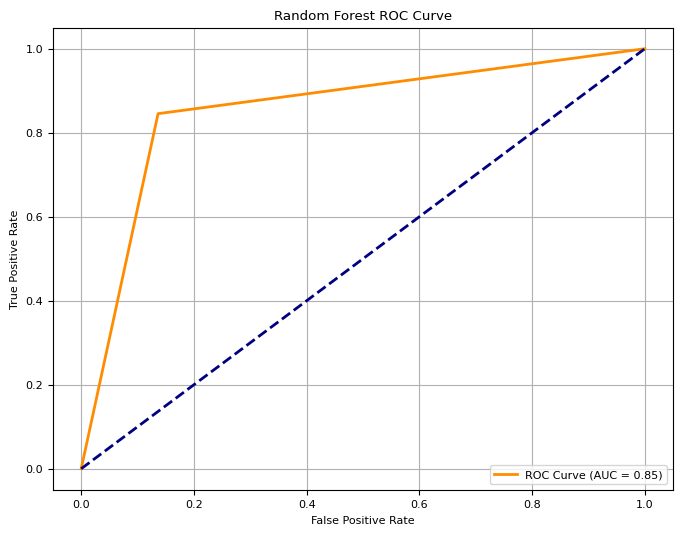

In [ ]:
# Get the probability predictions for the positive class
probs = rf.predict_proba(X_test)[:, 1]

# Compute false positive rate and true positive rate
fpr, tpr, threshold = roc_curve(y_test, y_pred)

# Compute the AUC score
roc_auc = roc_auc_score(y_test, y_pred)

# Plot ROC Curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color='navy', linestyle='--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random Forest ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()